<a href="https://colab.research.google.com/github/Azeemuddin47/MachineLearning/blob/main/ClothRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

In [32]:
img_rows, img_cols = 28, 28

batch_size = 128

num_classes = 10

epochs = 20

dropout = 0.5

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

orig_test = x_test

4423680/4422102 [==============================] - 0s 0us/step


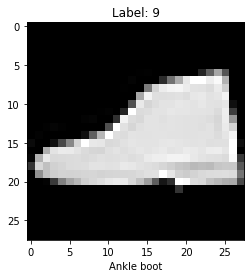

In [41]:
index = random.randrange(1000)
plt.imshow(orig_test[index], cmap = 'gray')
plt.title('Label: %s' % y_test[index])
plt.xlabel(class_names[y_test[index]])
plt.show()

In [42]:
if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols)

x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [94]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 10, activation = 'softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)       

Epoch 1/20
469/469 [==============================] - 33s 6ms/step - loss: 1.1315 - accuracy: 0.5639 - val_loss: 0.5480 - val_accuracy: 0.7983
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.5619 - accuracy: 0.7945 - val_loss: 0.4566 - val_accuracy: 0.8323
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4849 - accuracy: 0.8242 - val_loss: 0.4140 - val_accuracy: 0.8508
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4329 - accuracy: 0.8407 - val_loss: 0.3890 - val_accuracy: 0.8560
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4010 - accuracy: 0.8547 - val_loss: 0.3606 - val_accuracy: 0.8706
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3778 - accuracy: 0.8614 - val_loss: 0.3489 - val_accuracy: 0.8721
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3596 - accuracy: 0.8678 - val_loss: 0.3270 - val_accuracy: 0.8815
Epoch

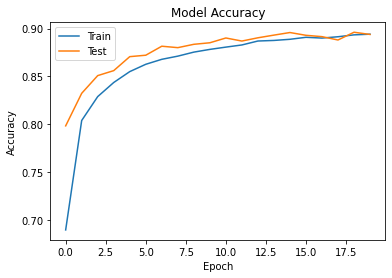

In [95]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose = 0)
print('Test Loss: ', score[0])
print('Test accuracy: ', score[1])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()


In [96]:
predictions = model.predict(x_test)
most_likely = predictions.argmax(1)

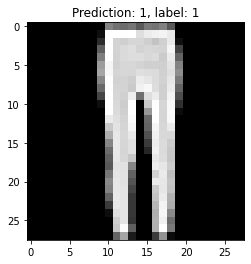

In [101]:
index = random.randrange(1000)
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.imshow(orig_test[index], cmap='gray')
plt.show()


In [103]:
from skimage import io, transform

Original image shape (1157, 1112, 4)


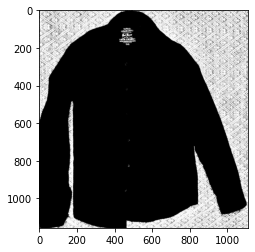

In [127]:
rgb = io.imread('1.png')
print(f'Original image shape {rgb.shape}')
plt.imshow(rgb)

Grayscale image shape(1157, 1112)


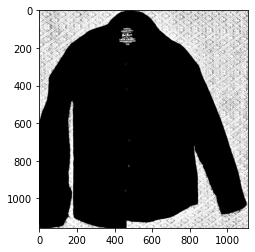

In [128]:
gray = np.dot(rgb[..., :], [0.299, 0.587, 0.114, 0])
print(f'Grayscale image shape{gray.shape}')
plt.imshow(gray, cmap = 'gray')

Resized image shape(28, 28)


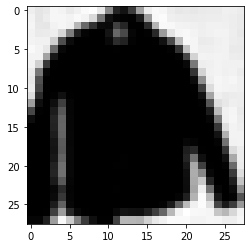

In [129]:
gray28x28 = transform.resize(gray, (img_rows, img_cols))
print(f'Resized image shape{gray28x28.shape}')
plt.imshow(gray28x28, cmap = 'gray')

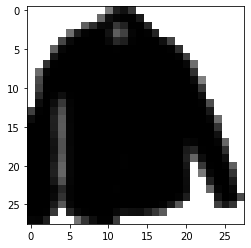

In [130]:
vectorized_filter = np.vectorize(lambda v: 255 if v > 128 else v)
filtered = vectorized_filter(gray28x28)
plt.imshow(filtered, cmap = 'gray')

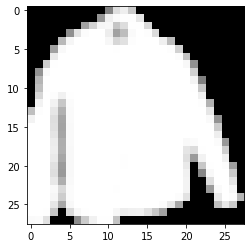

In [131]:
inverted = 255 - filtered
reshaped = inverted.reshape(img_rows, img_cols, 1) / 255.0
batch = np.array([reshaped])
plt.imshow(inverted, cmap = 'gray')

In [111]:
batch.max()

1.0

In [138]:
predictions = model.predict(batch)
most_likely = predictions.argmax(1)
most_likely


array([2])

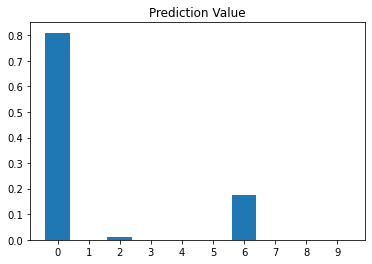

In [121]:
plt.bar(range(10), predictions[0], tick_label = range(10))
plt.title('Prediction Value')
plt.show()